# Assignment 1

# Problemstellung

Bei der Fertigung von Federspeicher-Feststellbremsen mussten 10% der Erzeugnisse einer Schicht auf Grund von unzureichender Bremskraft (gefordert sind 18kN) aussortiert werden. Auf Basis der während der Fertigung aufgenommenen Qualitätsdokumentation, sollen die zufälligen und systematischen Einflüsse verschiedener Parameter auf die erreichte Bremskraft der Federspeicher-Feststellbremsen untersucht werden.

# **Import und Aufbereitung der erhaltenen Daten**

**Aktivierung erforderlicher Module:**

In [1]:
# OS to use file system
import os
# Matplotlib and the pyplot module for a Matlab-like plot syntax
import matplotlib
# This is the syntax to import as a named module
import matplotlib.pyplot as plt
# Pandas is a module for rectangular data "dataframe"
import pandas as pd
# Special module for a very quick analysis
from pandas.plotting import scatter_matrix
# Plot the graphs in the notebook
%matplotlib inline
import seaborn as sns
import plotly.offline as po
import plotly.graph_objs as go

Die erhaltene Datei (SpringPBData.csv) wird zunächst in Pandas als Dataframe importiert und anschließend so aufbereitet, dass die erste Spalte als "datetimeindex" erkannt und dargestellt wird. Zudem werden die übrigen Spalten durch Ergänzung der Einheit der Messgröße umbenannt.

In [2]:
# Import der Daten (.csv) in Pandas (pd) dataframe (df)
df = pd.read_csv(os.path.join("SpringPBData.csv"))

# Darstellung der ersten Zeilen des dataframe, um Daten zu betrachten.
df.head()

,Unnamed: 0,F,d,h1,h2,l,x
0,2017-10-26 07:30:00,18905.806965,0.005124,-0.047404,-0.031544,0.015860,-0.057963
1,2017-10-26 07:32:00,20026.385396,0.048496,0.008175,-0.014790,-0.022965,0.018917
2,2017-10-26 07:34:00,19874.917201,-0.013561,0.046190,0.001044,-0.045146,-0.011473
3,2017-10-26 07:36:00,18058.438190,0.048965,-0.026648,-0.072617,-0.045969,-0.096269
4,2017-10-26 07:38:00,18187.872511,0.034729,-0.017012,-0.063248,-0.046235,-0.091767


In [3]:
# Benennen der unbenannten Spalte
df.rename(columns = {"Unnamed: 0":"Zeit"}, inplace = True)

# Formatieren der ersten Zeile als datetimeindex auf Basis der neu benannten Zeile
df.set_index(pd.to_datetime(df["Zeit"]), inplace = True)

# Löschen der zweiten Spalte "Zeit"
df.drop("Zeit", axis = 1, inplace = True)


df.head()

,F,d,h1,h2,l,x
Zeit,,,,,,
2017-10-26 07:30:00,18905.806965,0.005124,-0.047404,-0.031544,0.015860,-0.057963
2017-10-26 07:32:00,20026.385396,0.048496,0.008175,-0.014790,-0.022965,0.018917
2017-10-26 07:34:00,19874.917201,-0.013561,0.046190,0.001044,-0.045146,-0.011473
2017-10-26 07:36:00,18058.438190,0.048965,-0.026648,-0.072617,-0.045969,-0.096269
2017-10-26 07:38:00,18187.872511,0.034729,-0.017012,-0.063248,-0.046235,-0.091767


In [4]:
# Umbenennen der übrigen Spalten durch ergänzen von Einheiten zu den Parametern
df.rename(columns = {"F":"F/N"}, inplace = True)
df.rename(columns = {"d":"d/mm"}, inplace = True)
df.rename(columns = {"h1":"h1/mm"}, inplace = True)
df.rename(columns = {"h2":"h2/mm"}, inplace = True)
df.rename(columns = {"l":"l/mm"}, inplace = True)
df.rename(columns = {"x":"x/mm"}, inplace = True)

df.head()

,F/N,d/mm,h1/mm,h2/mm,l/mm,x/mm
Zeit,,,,,,
2017-10-26 07:30:00,18905.806965,0.005124,-0.047404,-0.031544,0.015860,-0.057963
2017-10-26 07:32:00,20026.385396,0.048496,0.008175,-0.014790,-0.022965,0.018917
2017-10-26 07:34:00,19874.917201,-0.013561,0.046190,0.001044,-0.045146,-0.011473
2017-10-26 07:36:00,18058.438190,0.048965,-0.026648,-0.072617,-0.045969,-0.096269
2017-10-26 07:38:00,18187.872511,0.034729,-0.017012,-0.063248,-0.046235,-0.091767


# Auswertung der Daten

**Gesamtheitliche Betrachtung der Daten**

Zu Anfang stellt sich die Frage, wieviele der in der Schicht produzierten Federspeicher-Feststellbremsen weniger als die geforderte Bremskraft von 18000N erreichen. Die Anzahl der fehlerhaften Produkte wird nun wie folgt bestimmt.

In [5]:
# Zählen der Datenreihen, bei denen die Kraft F<18000N ist
df[df["F/N"]< 18000]["F/N"].count()

42

Insgesamt mussten 42 Federspeicher-Feststellbremsen, die in der Schicht produziert wurden, aussortiert werden, da sie nicht die geforderte Bremskraft von 18kN erreichen.

Zunächst werden die im dataframe (df) enthaltenen Daten mit Hilfe einer "scatter-Matrix" dargestellt, um systematische Beziehungen zwischen den einzelenen Parametern aufzudecken.

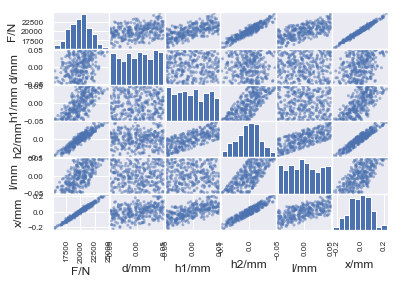

In [6]:
# Erstellen einer scatter_matrix
sns.set()
q = scatter_matrix(df)

Alle Graphen aus der obigen Matrix, bei denen sich beim Auftragen eines Parameters über der erreichten Bremskraft F keine Punktewolke, sondern eine mehr oder weniger klar definierte Gerade darstellt, werden nun als einzelne Diagramme dargestellt. Bei den Diagrammen, welche eine Punktewolke aufweisen, ist davon auszugehene, dass die aufgetragenen Parameter nicht korrelieren und deshalb keinen systematischen Einfluss auf die Bremskraft haben. Bei den Diagrammen, in denen die Punktewolke in Form einer Geraden ausgebildet ist, ist hingegen ein systematischer Einfluss auf die erreichte Bremskraft zu erwarten.

Zusätzlich zur Zuordnung zweier Parameter auf der x- und y- Achse, wird im Diagramm noch hervorgehoben, ob die geforderte Bremskraft von 18.000N erreicht wurde oder nicht. Dazu wird eine Matrix c eingeführt, in der den Datenreihen einer Federspeicher-Feststellbremse eine 0 zugeordnet wird, wenn die erreichte Kraft F>18000N ist bzw. eine 1 zugeordnet wird, wenn die erreichte Kraft F<18000N ist. Alle Produkte, denen eine 1 zugeordnet wird, mussten demnach aussortiert werden. So kann farblich visualisiert werden, für welche Werte(bereiche) der dargestellten Parameter die geforderte Bremskraft von 18kN unterschritten wird.

In [7]:
# Definieren einer Kraft Fziel
Fziel=18000

# Definition einer Matrix c zur Unterscheidung zwischen Ausschuss (1) und Gutteilen (0) bezogen auf die Daten aus df
c = (df["F/N"]<Fziel)*1.0

**-------------------------------------------------------------------------------------------------------------------**

**Betrachtung des Parameters d über der Kraft F**

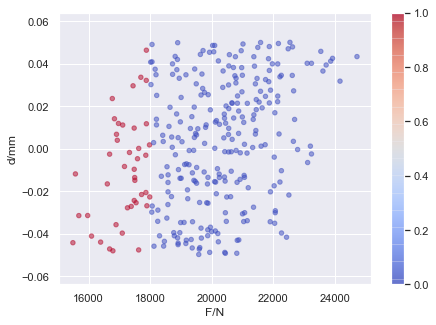

In [8]:
# Diagramm Abmaß d/mm über der Kraft F/N
fig, ax = plt.subplots()
df.plot(kind="scatter", y="d/mm", x="F/N", alpha = 0.5, figsize=(7,5), c = c, cmap = "coolwarm", ax=ax)

Im obigen Diagramm sieht man eine klare Trennung zwischen den Bremsen, welche die erforderliche Bremskraft von 18000N nicht erreicht haben (hier rot eingefärbt) und denjenigen, welche diese Anforderung erfüllt haben (hier blau eingefärbt).

Der Parameter d scheint keinen systematischen Einfluss auf die erreichte Bremskraft der Federspeicher-Feststellbremse zu haben, da für den Toleranzbereich des Parameters von +/-0,06mm die geforderte Kraft teilweise erreicht und teilweise nicht erreicht wurde. Der Parameter d hat demnach eher einen zufälligen Einfluss auf die erreichte Bremskraft.

**-------------------------------------------------------------------------------------------------------------------**

**Betrachtung des Parameters h1 über der Kraft F**

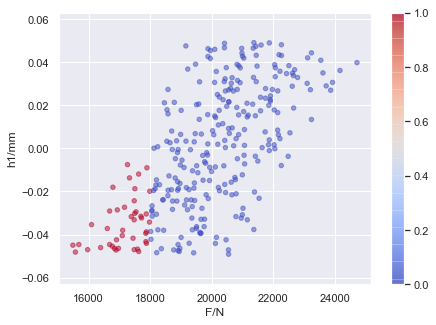

In [9]:
# Diagramm Abmaß h1/mm über der Kraft F/N
fig, ax = plt.subplots()
df.plot(kind="scatter", y="h1/mm", x="F/N", alpha = 0.5, figsize=(7,5), c = c, cmap = "coolwarm", ax=ax)

In [10]:
# Bestimmung des maximalen Abmaßes h1, für das die Bremskraft F<18000N ist
df[df["F/N"]<18000]["h1/mm"].max()

-0.007533207914383319

Auch der Parameter h1 zeigt aufgetragen über der Bremskraft F keinen systematischen Einfluss in Form einer geradenförmigen Datenpunktverteilung. Zwar könnte man zu dem Schluss kommen, dass für Abweichungen vom Nennmaß >-0,007mm die geforderte Bremskraft von 18000N immer erreicht wird, allerdings hätte dies im Umkehrschluss jedoch zur Folge, dass alle Federspeicher-Feststellbremsen, bei denen für h1 eine Abweichung vom Nennmaß <-0,007 gemessen wird, als Ausschuss betrachtet werden. 

In [11]:
# Zählen der Datenreihen, bei denen das Abmaß von h1<0 ist
df[df["h1/mm"]< (-0.007)]["h1/mm"].count()

139

Dies wären im Vergleich zu den 42 Federspeicher-Feststellbremsen, welche die 18kN nicht vorweisen können, insgesamt 139 Produkte, die als Ausschuss betrachtet werden würden. So würden mehr als dreimal so viele Bremsen aussortiert, als eigentlich nötig. 
Deshalb scheint dieser Grenzwert nicht sinnvoll zu sein und der Parameter h1 keinen entscheidenden systematischen Einfluss auf die Bremskraft zu haben.

**-------------------------------------------------------------------------------------------------------------------**

**Betrachtung des Parameters h2 über der Kraft F**

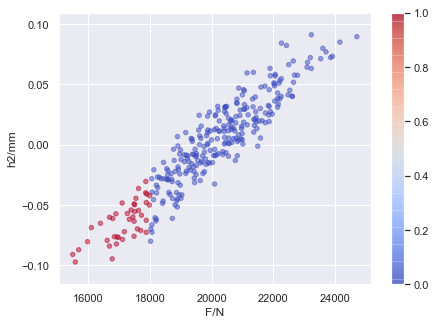

In [12]:
# Diagramm Abmaß h2/mm über der Kraft F/N
fig, ax = plt.subplots()
df.plot(kind="scatter", y="h2/mm", x="F/N", alpha = 0.5, figsize=(7,5), c = c, cmap = "coolwarm", ax=ax)

In [13]:
# Bestimmung des minimalen Abmaßes h2, für das die Bremskraft F>18000N ist
df[df["F/N"]>18000]["h2/mm"].min()

-0.08003825320412827

In [14]:
# Bestimmung des maximalen Abmaßes h2, für das die Bremskraft F<18000N ist
df[df["F/N"]<18000]["h2/mm"].max()

-0.030479365999016805

Die obige Darstellung lässt einen systematischen Einfluss des Parameters h2 auf die Bremskraft F vermuten, da die aufgetragenen Datenpunkte eine Gerade darstellen. Es lässt sich feststellen, dass teilweise bereits für h2>-0,08mm die geforderte Bremskraft erreicht wird. Die aussagekräftigere Erkenntnis ist jedoch, dass für h2>-0,03mm die geforderte Bremskraft von 18000N in dieser Schicht immer erreicht wurde.

Daraus kann ein geforderter Grenzwert für den Parameter h2 abgeleitet werden: 
Der Parameter h2 darf ein unteres Abmaß von -0,03mm nicht überschreiten. Der Wert des oberen Abmaßes scheint unkritisch zu sein.

In [15]:
# Zählen der Datenreihen, bei denen das Abmaß h2<-0,03mm ist
df[df["h2/mm"] < (-0.03) ]["h2/mm"].count()

73

Wendet man den angesprochenen Grenzwert des Parameters h2 zur Unterscheidung zwischen Ausschuss und Gutteilen an, würden insgesamt 73 Bremsen als Ausschuss aussortiert werden. Neben den 42 Bremsen mit tatsächlich unzureichenden Eigenschaften wären also auch 31 "gute" Bremsen betroffen. Ein dadurch generierter zusätzlicher Ausschuss von fast 75% ist jedoch nicht zielführend, weshalb der Parameter h2 alleine nicht als Entscheidungsgrundlage herangezogen werden sollte. 

Zusätzlich wird nun noch der Prameter "h2" über der Zeit aufgetragen. So könnten Zeiträume, in denen der Parameter h2 vermehrt unter der oben genannten Grenze von -0,03mm liegt, erkannt werden. 

Text(0,0.5,'h2/mm')

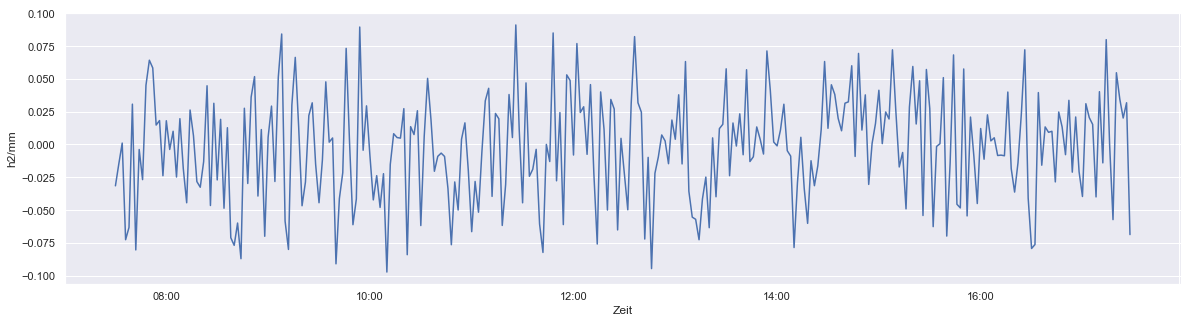

In [16]:
# Diagramm Abmaß h2/mm über der Zeit
fig, ay=plt.subplots()
df['h2/mm'].plot( figsize=(20,5))
ay.set_ylabel("h2/mm", fontsize=12)

Der zeitliche Verlauf des Parameters h2 zeigt jedoch keine zusätzliche Auffälligkeit. Demnach gab es während der Schicht scheinbar keine Zeiten, zu denen vermehrt Ausschuss produziert wurde.

**-------------------------------------------------------------------------------------------------------------------**

**Betrachtung des Parameters l über der Kraft F**

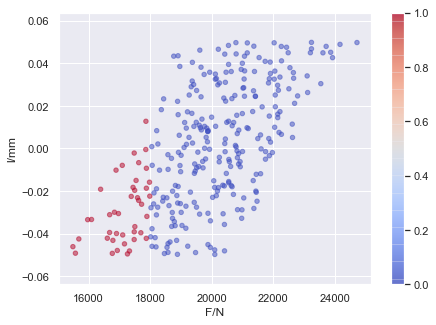

In [17]:
# Diagramm Abmaß l/mm über der Kraft F/N
fig, ax = plt.subplots()
df.plot(kind="scatter", y="l/mm", x="F/N", alpha = 0.5, figsize=(7,5), c = c, cmap = "coolwarm", ax=ax)

In [18]:
# Bestimmung des maximalen Abmaßes l, für das die Bremskraft F<18000N ist
df[df["F/N"]<18000]["l/mm"].max()

0.012766293213795007

Ähnlich, wie beim Parameter h1, zeigt auch das Abmaß l keinen systematischen Einfluss auf die Bremskraft F. Die Ableitung eines möglichen Grenzwerts, bei dem keine Federspeicher-Feststellbremse mehr eine unzureichende Bremskraft <18kN aufweist, aus dem obigen Diagramm ist wenig sinnvoll, da so auch zuviele Gutteile aussortiert werden würden. Bei den wegen unzureichender Bremskraft aussortiereten Bremsen beträgt ein möglicher oberer Grenzwert des Abmaßes 0,013mm.

In [19]:
# Zählen der Datenreihen, bei denen das Abmaß l<0,013mm ist
df[df["l/mm"] < 0.013 ]["l/mm"].count()

201

Würde man also alle Bremsen, bei denen das Abmaß kleiner als 0,013mm ist, aussortieren, würden fast fünfmal soviele Produkte als Ausschuss deklariert, als eigentlich nötig. Dies wäre wirtschaftlich keinesfalls sinnvoll. Ein systematischer Einfluss des Parameters l auf die erreichte Bremskraft ist zudem nicht festzustellen.

**-------------------------------------------------------------------------------------------------------------------**

**Betrachtung des Parameters x über der Kraft F**

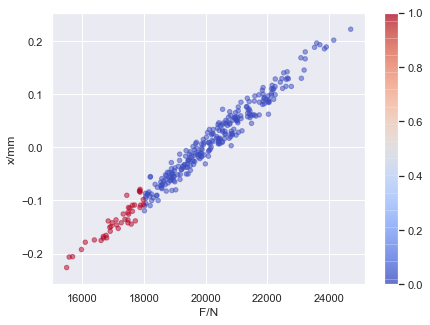

In [20]:
# Diagramm Abmaß x/mm über der Kraft F/N
fig, ax = plt.subplots()
df.plot(kind="scatter", y="x/mm", x="F/N", alpha = 0.5, figsize=(7,5), c = c, cmap = "coolwarm", ax=ax)

In [21]:
# Bestimmung des maximalen Abmaßes x, für das die Bremskraft F<18000N ist
df[df["F/N"]<18000]["x/mm"].max()

-0.0790738624956795

Trägt man das Abmaß der Summe aller Abweichungen x über der Kraft F auf, so stellen sich die Daten in einer sehr  ausgeprägten Geraden dar. Es lässt sich ermitteln, dass alle aussortierten Bremsen im Bereich x<-0,079mm liegen.

In [22]:
# Zählen der Datenreihen, bei denen das Abmaß x<-0,079mm ist
df[df["x/mm"] < (-0.079) ]["x/mm"].count()

62

Zusätzlich zu den 42 tatsächlich ungenügenden Bremsen würden bei Anwendung dieses Grenzwertes aber immer noch 20 Bremsen aussortiert werden, welche eigentlich die Anforderungen erfüllen. Dennoch liefert dieser Parameter den bislang deutlichsten systematischen Einfluss und das zuverlässigste Entscheidungskriterium zur Bestimmung von Ausschuss.

Wie auch schon beim Parameter h2, wird auch das Abmaß der Summe aller Abweichungen x über der Zeit aufgetragen, um mögliche zeitliche Systematiken zu erkennen.

Text(0,0.5,'x/mm')

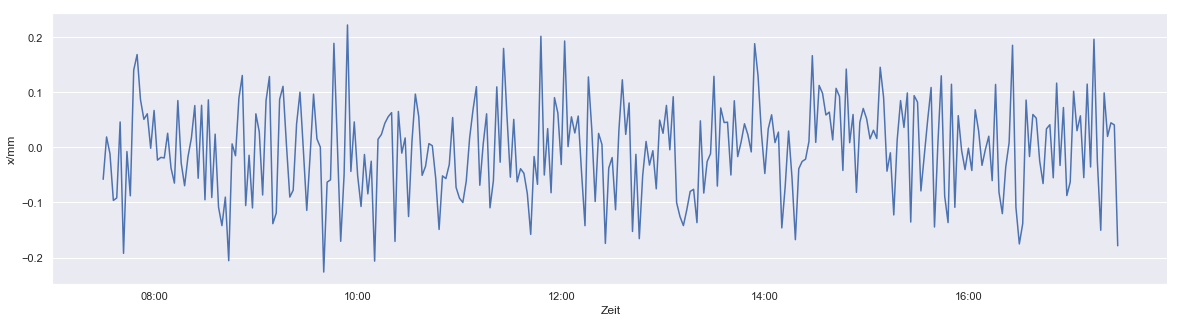

In [23]:
# Diagramm Abmaß x/mm über der Zeit
fig, ay=plt.subplots()
df['x/mm'].plot( figsize=(20,5))
ay.set_ylabel("x/mm", fontsize=12)

Bei Betrachtung des obigen Diagramms können jedoch keine Auffälligkeiten bezüglich des zeitlichen Verhaltens des Parameters x verbucht werden.

**-------------------------------------------------------------------------------------------------------------------**

**Betrachtung des Parameters x über dem Parameter h2 unter Anwendung verschiedener Grenzwerte**

Um bei der Bestimmung von Ausschuss anhand der Parameter x und h2, welche den größten systematischen Einfluss auf die Bremskraft F vorweisen, ein möglichst verlässliches und genaues Ergebnis zu erreichen, werden diese Parameter nun näher betrachtet.

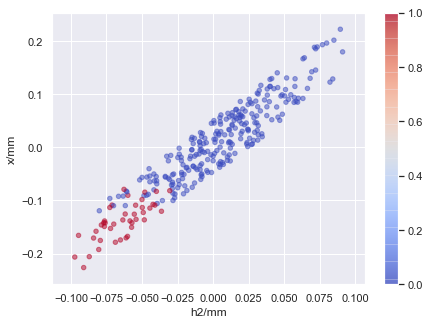

In [24]:
# Diagramm Abmaß x/mm über dem Abmaß h2/mm
fig, ax = plt.subplots()
df.plot(kind="scatter", y="x/mm", x="h2/mm", alpha = 0.5, figsize=(7,5), c = c, cmap = "coolwarm", ax=ax)

Im obigen Digramm wird deutlich, dass die aussortierten Bremsen vornehmlich in einen gewissen Wertebereich der beiden Parameter x und h2 zu finden sind. Dieser Bereich wird durch die erarbeiteten Grenzwerte beider Parameter eingegrenzt. Dadurch, dass die Datenpunkte der guten und schlechten Bremsen an der Grenze dieses Bereichs jedoch etwas verschwimmen, wird durch die nun nachfolgend durchgeführte Filterung der Daten durch Anwendung der Grenzwerte von x und h2  versucht, die Anzahl der als Ausschuss definierten Bremsen möglichst der Realität anzunähern.

In [46]:
# Filtern von df, sodass nur noch Daten der Bremsen enthalten sind, für die gilt: x<-0,079mm
# einmal gefilterte Daten sind in df1 enthalten
df1=df[df["x/mm"]<(-0.079)]
# Anzahl der in df1 enthaltenen und nach Anwendung des Grenzwertes von x als Ausschuss definierten Bremsen 
df1["F/N"].count()

62

In [47]:
# Definition einer Matrix c zur Unterscheidung zwischen Ausschuss (1) und Gutteilen (0) bezogen auf die Daten aus df1
c1=(df1["F/N"]<Fziel)*1.0

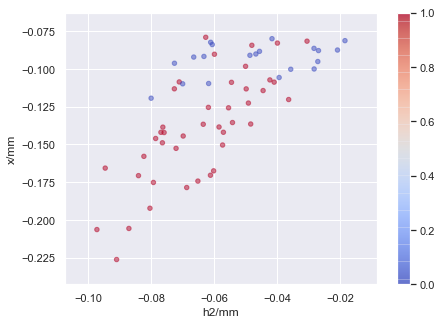

In [48]:
# Diagramm Abmaß x/mm über dem Abmaß h2/mm mit Datenpunkten der Bremsen, für die gilt: x<-0,079mm
fig, ax = plt.subplots()
df1.plot(kind="scatter", y="x/mm", x="h2/mm", alpha = 0.5, figsize=(7,5), c = c1, cmap = "coolwarm", ax=ax)

Wendet man zum Aussortieren der ungenügenden Federspeicher-Feststellbremsen nur den Grenzwert des Parameters x an, würden zusätzlich zu den 42 im obigen Diagramm rot markierten Produkten mit unzureichender Bremskraft auch 20 (62-42=20; 62/300=20,6%) im Diagramm blau markierte Bremsen aussortiert werden, welche eigentlich die Anforderung von F>18kN erfüllen.

Um die Anzahl der irrtümlich aussortierten guten Bremsen möglist gering zu halten, wird geprüft ob und wie sehr sich der oben festgesetzte Grenzwert h2<-0,03mm bei der Bestimmung des Ausschuss als hilfreich erweist.

In [50]:
# Filtern von df1, sodass nur noch Daten der Bremsen enthalten sind, für die gilt: x<-0,079mm und h2<-0,03mm
# zweimal gefilterte Daten sind in df2 enthalten
df2=df1[df1["h2/mm"]<(-0.03)]
# Anzahl der in df2 enthaltenen und nach Anwendung der Grenzwerte von x und h2 als Ausschuss definierten Bremsen 
df2["F/N"].count()

56

In [51]:
# Definition einer Matrix c zur Unterscheidung zwischen Ausschuss (1) und Gutteilen (0) bezogen auf die Daten aus df2
c2=(df2["F/N"]<Fziel)*1.0

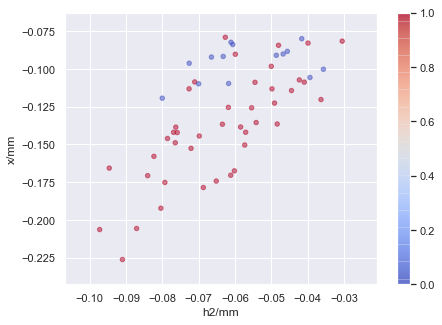

In [52]:
# Diagramm Abmaß x/mm über dem Abmaß h2/mm mit Datenpunkten der Bremsen, für die gilt: x<-0,079mm und h2<-0,03mm
fig, ax = plt.subplots()
df2.plot(kind="scatter", y="x/mm", x="h2/mm", alpha = 0.5, figsize=(7,5), c = c2, cmap = "coolwarm", ax=ax)

Wendet man zum Aussortieren der ungenügenden Federspeicher-Feststellbremsen auch noch den Grenzwert des Parameters h2 an, würden zusätzlich zu den 42 im obigen Diagramm rot markierten Produkten mit unzureichender Bremskraft weiterhin 14 (56-42=14; 56/300=18,6%) im Diagramm blau markierte Bremsen aussortiert werden, welche eigentlich die Anforderung von F>18kN erfüllen. Das Ergebnis konnte im Vergleich zur alleinigen Anwendung des Parameters x so verbessert werden, dass 30% (6/20=0,3) weniger Gutteile als Ausschuss aussortiert werden.

Da die zusätzliche Anwendung eines Grenzwertes des Parameters h2 einen positiven Effekt hatte, wird nun zusätzlich noch der Einfluss des Grenzwertes des Parameters h1 geprüft. Es wird also noch der oben festgesetzte Grenzwert h1<-0,007mm zur Bestimmung des Ausschuss hinzugezogen.

In [53]:
# Filtern von df2, sodass nur noch Daten der Bremsen enthalten sind, für die gilt: x<-0,079m; h2<-0,03mm und h1<-0,007mm
# dreimal gefilterte Daten sind in df3 enthalten
df3=df2[df2["h1/mm"]<(-0.007)]
# Anzahl der in df3 enthaltenen und nach Anwendung der Grenzwerte von x, h2 und h1 als Ausschuss definierten Bremsen 
df3["F/N"].count()

55

In [54]:
# Überprüfung, ob noch alle tatsächlich aussortierten Bremsen in der Matrix df3 enthalten sind 
df3[df3["F/N"]<Fziel]["F/N"].count()

42

In [55]:
# Definition einer Matrix c zur Unterscheidung zwischen Ausschuss (1) und Gutteilen (0) bezogen auf die Daten aus df3
c3=(df3["F/N"]<Fziel)*1.0

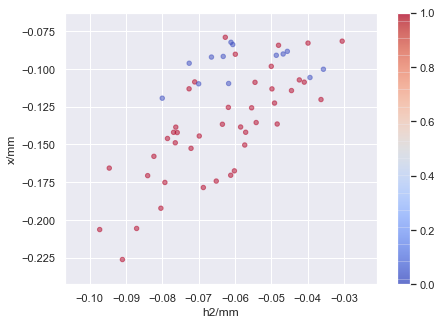

In [56]:
# Diagramm Abmaß x/mm über dem Abmaß h2/mm mit Datenpunkten der Bremsen, für die gilt: x<-0,079mm; h2<-0,03mm und h1<-0,007mm
fig, ax = plt.subplots()
df3.plot(kind="scatter", y="x/mm", x="h2/mm", alpha = 0.5, figsize=(7,5), c = c3, cmap = "coolwarm", ax=ax)

Wendet man zum Aussortieren der ungenügenden Federspeicher-Feststellbremsen auch noch den Grenzwert des Parameters h1 an, würden zusätzlich zu den 42 im obigen Diagramm rot markierten Produkten mit unzureichender Bremskraft nun nur noch 13 (55-42=13; 55/300=18,3%) im Diagramm blau markierte Bremsen aussortiert werden, welche eigentlich die Anforderung von F>18kN erfüllen.
Das Ergebnis der als Ausschuss bestimmten Bremsen konnten, im Vergleich zur Anwendung der Grenzwerte der Parameter x und h2, durch den Grenzwert des Parameters h1 nur noch geringfügig verbessert werden. Der (systematische) Einfluss des Parameters h1 ist also eher marginal.

Die Parameter d und l wurden bei dieser Betrachtung außer Acht gelassen, da festgestellt werden konnte, dass sie einen geringen und eher zufälligen Einfluss auf die Bremskraft F besitzen.

**-------------------------------------------------------------------------------------------------------------------**

# Schlussfolgerung

Als Parameter, welche einen systematischen Einfluss auf die Bremskraft F besitzen, sind vor allem die Parameter x, h2 und h1 zu nennen. Dabei ist zu berücksichtigen, dass die Parameter h2 und h1 in gewisser Weise im Parameter x enthalten sind, da dieser die Summe aller Abweichungen darstellt. Demnach ist wenig verwunderlich, dass die Datenpunkte im Diagramm, welches den Parameter x aufgetragen über der Kraft F darstellt, die ausgeprägteste Form einer Geraden verkörpern. Der daraus abgeleitete Grenzwert x<-0,079mm ermöglicht eine sehr einfache, aber sichere Möglichkeit, alle Federspeicher-Feststellbremsen mit unzureichender Bremskraft zu detektieren. Es ist jedoch anzumerken, dass so auch einige Bremsen vorläufig aussortiert werden, welche die geforderte Bremskraft erreichen. Diese können jedoch durch die genauere Prüfung der Bremskraft einer kleineren Losmenge von Bremsen, welche nur ca. 20% der in dieser Schicht produzierten Bremsen umfasst, schnell ausgemacht und den übrigen guten Bremsen wieder zugeführt werden.

Zur Reduzierug der Anzahl der aussortierten guten Bremsen eignet sich vor allem der Parameter h2 unter Anwendung des herausgearbeiteten Grenzwertes (h2<-0,03mm). Um das so erzielte Ergebnis noch zu oprimieren kann azusätzlich der Parameter h1 mit dem für ihn dargelegten Grenzwert (h1<-0,007mm) herangezogen werden, wobei der Einfluss des Parameters h1 auf die Anzahl der aussortierten Bremsen deutlich gering ist als der des Parameters h2. Trotz des Umstandes, dass die beiden angesprochenen Parameter bereits in der Summe aller Abweichungen (x) enthalten sind, kann die angesprochene kleine Losmenge von aussortierten Bremsen jedoch nocheinmal verkleinert werden, sodass weniger gute Bremsen vorläufig als Ausschuss betrachtet werden und nur noch ca. 18% der produzierten Bremsen genauer analysiert werden müssen.

Doch selbst wenn dies nicht geschieht, bietet der Parameter x in Form der Summe aller Abweichungen ein systematisches Erkennungswerkzeug, anhand dessen alle Federspeicher-Feststellbremsen mit ungenügender Bremskraft auszumachen sind. Anhand dieses Parameters lässt sich konstatieren, dass die einzelnen Abmaße der Parameter weniger bedeutsam sind, als deren Summe, welche einen gewissen Grenzwert des unteren Abmaßes nicht überschreiten darf, ohne dass die Gefahr besteht mit hoher Wahrscheinlichkeit eine unzureichende Bremskraft zu bewirken. 

Wenn es darum geht einzelne Parameter hinsichtlich ihres Einflusses auf die Bremskraft hervorzuheben, so ist vorallem der Parameter h2 zu nennen, welcher sich im Vergleich zu den anderen Parametern vorallem dadurch auszeichnet, dass er das größte Abmaß verkörpert, welches im Zuge der Qualitätsdokumentation ermittelt wurde und deshalb auch die Summe der Abweichungen (x) maßgeblich mitbestimmt. 

**--------------------------------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------------------------------------**